# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [ ]:
!pip install pymongo

In [ ]:
!pip install pymongo[srv]

In [ ]:
!pip install dnspython

In [ ]:
!pip install tweepy

In [ ]:
!pip install twitter

## Import Python libraries

In [4]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [5]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [4]:
client = MongoClient(mongod_connect)
db = client.gp10 # use or create a database named demo
tweet_collection = db.lab10 #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [7]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [8]:
track = ['covid19'] # define the keywords, tweets contain election

#locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [9]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

1327000260443455488
1327000260607049729
1327000260707840004
1327000261257269249
1327000261852758016
1327000262775627777
1327000263505350657
1327000263710953472
1327000264151363589
1327000264461660176
1327000264570785805
1327000264734355459
1327000264797196288
1327000264822427654
1327000265216540672
1327000265518702592
1327000268035272704
1327000268253360138
1327000268534386695
1327000268555374592
1327000268614070272
1327000269826224133
1327000271373922308
1327000272263065602
1327000272543961088
1327000272648998915
1327000272149819399
1327000273152319495
1327000273307529217
1327000273559044097
1327000274733576192
1327000275639431168
1327000276532932608
1327000276390260737
1327000277334061057
1327000279850639379
1327000281326956547
1327000281985540097
1327000282430124038
1327000282895626242
1327000283914842114
1327000283843588096
1327000284204310528
1327000285592637445
1327000285319979009
1327000286301282304
1327000286574112770
1327000286859321346
1327000287773675525
1327000288142745601


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [10]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [11]:
count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [12]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Thu Nov 12 21:28:45 +0000 2020'
'Thu Nov 12 21:28:45 +0000 2020'
'Thu Nov 12 21:28:45 +0000 2020'
'Thu Nov 12 21:28:44 +0000 2020'
'Thu Nov 12 21:28:44 +0000 2020'
'Thu Nov 12 21:28:44 +0000 2020'
'Thu Nov 12 21:28:43 +0000 2020'
'Thu Nov 12 21:28:43 +0000 2020'
'Thu Nov 12 21:28:43 +0000 2020'
'Thu Nov 12 21:28:43 +0000 2020'
'Thu Nov 12 21:28:43 +0000 2020'
'Thu Nov 12 21:28:42 +0000 2020'
'Thu Nov 12 21:28:42 +0000 2020'
'Thu Nov 12 21:28:41 +0000 2020'
'Thu Nov 12 21:28:41 +0000 2020'
'Thu Nov 12 21:28:41 +0000 2020'
'Thu Nov 12 21:28:41 +0000 2020'
'Thu Nov 12 21:28:40 +0000 2020'
'Thu Nov 12 21:28:40 +0000 2020'
'Thu Nov 12 21:28:40 +0000 2020'
'Thu Nov 12 21:28:40 +0000 2020'
'Thu Nov 12 21:28:40 +0000 2020'
'Thu Nov 12 21:28:39 +0000 2020'
'Thu Nov 12 21:28:39 +0000 2020'
'Thu Nov 12 21:28:39 +0000 2020'
'Thu Nov 12 21:28:38 +0000 2020'
'Thu Nov 12 21:28:38 +0000 2020'
'Thu Nov 12 21:28:38 +0000 2020'
'Thu Nov 12 21:28:38 +0000 2020'
'Thu Nov 12 21:28:37 +0000 2020'
'Thu Nov 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [13]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                         max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Thu Nov 12 21:28:10 +0000 2020'
'Thu Nov 12 21:28:10 +0000 2020'
'Thu Nov 12 21:28:10 +0000 2020'
'Thu Nov 12 21:28:10 +0000 2020'
'Thu Nov 12 21:28:10 +0000 2020'
'Thu Nov 12 21:28:10 +0000 2020'
'Thu Nov 12 21:28:09 +0000 2020'
'Thu Nov 12 21:28:09 +0000 2020'
'Thu Nov 12 21:28:09 +0000 2020'
'Thu Nov 12 21:28:09 +0000 2020'
'Thu Nov 12 21:28:09 +0000 2020'
'Thu Nov 12 21:28:09 +0000 2020'
'Thu Nov 12 21:28:08 +0000 2020'
'Thu Nov 12 21:28:08 +0000 2020'
'Thu Nov 12 21:28:08 +0000 2020'
'Thu Nov 12 21:28:08 +0000 2020'
'Thu Nov 12 21:28:08 +0000 2020'
'Thu Nov 12 21:28:08 +0000 2020'
'Thu Nov 12 21:28:07 +0000 2020'
'Thu Nov 12 21:28:06 +0000 2020'
'Thu Nov 12 21:28:06 +0000 2020'
'Thu Nov 12 21:28:06 +0000 2020'
'Thu Nov 12 21:28:06 +0000 2020'
'Thu Nov 12 21:28:06 +0000 2020'
'Thu Nov 12 21:28:05 +0000 2020'
'Thu Nov 12 21:28:05 +0000 2020'
'Thu Nov 12 21:28:05 +0000 2020'
'Thu Nov 12 21:28:05 +0000 2020'
'Thu Nov 12 21:28:05 +0000 2020'
'Thu Nov 12 21:28:05 +0000 2020'
'Thu Nov 1

'Thu Nov 12 21:27:10 +0000 2020'
'Thu Nov 12 21:27:10 +0000 2020'
'Thu Nov 12 21:27:10 +0000 2020'
'Thu Nov 12 21:27:09 +0000 2020'
'Thu Nov 12 21:27:09 +0000 2020'
'Thu Nov 12 21:27:09 +0000 2020'
'Thu Nov 12 21:27:09 +0000 2020'
'Thu Nov 12 21:27:09 +0000 2020'
'Thu Nov 12 21:27:07 +0000 2020'
'Thu Nov 12 21:27:07 +0000 2020'
'Thu Nov 12 21:27:07 +0000 2020'
'Thu Nov 12 21:27:07 +0000 2020'
'Thu Nov 12 21:27:07 +0000 2020'
'Thu Nov 12 21:27:07 +0000 2020'
'Thu Nov 12 21:27:06 +0000 2020'
'Thu Nov 12 21:27:06 +0000 2020'
'Thu Nov 12 21:27:06 +0000 2020'
'Thu Nov 12 21:27:06 +0000 2020'
'Thu Nov 12 21:27:05 +0000 2020'
'Thu Nov 12 21:27:05 +0000 2020'
'Thu Nov 12 21:27:05 +0000 2020'
'Thu Nov 12 21:27:05 +0000 2020'
'Thu Nov 12 21:27:05 +0000 2020'
'Thu Nov 12 21:27:04 +0000 2020'
'Thu Nov 12 21:27:03 +0000 2020'
'Thu Nov 12 21:27:03 +0000 2020'
'Thu Nov 12 21:27:03 +0000 2020'
'Thu Nov 12 21:27:03 +0000 2020'
'Thu Nov 12 21:27:03 +0000 2020'
'Thu Nov 12 21:27:01 +0000 2020'
'Thu Nov 1

'Thu Nov 12 21:26:11 +0000 2020'
'Thu Nov 12 21:26:11 +0000 2020'
'Thu Nov 12 21:26:11 +0000 2020'
'Thu Nov 12 21:26:11 +0000 2020'
'Thu Nov 12 21:26:10 +0000 2020'
'Thu Nov 12 21:26:10 +0000 2020'
'Thu Nov 12 21:26:10 +0000 2020'
'Thu Nov 12 21:26:09 +0000 2020'
'Thu Nov 12 21:26:09 +0000 2020'
'Thu Nov 12 21:26:08 +0000 2020'
'Thu Nov 12 21:26:08 +0000 2020'
'Thu Nov 12 21:26:08 +0000 2020'
'Thu Nov 12 21:26:07 +0000 2020'
'Thu Nov 12 21:26:07 +0000 2020'
'Thu Nov 12 21:26:07 +0000 2020'
'Thu Nov 12 21:26:07 +0000 2020'
'Thu Nov 12 21:26:07 +0000 2020'
'Thu Nov 12 21:26:07 +0000 2020'
'Thu Nov 12 21:26:06 +0000 2020'
'Thu Nov 12 21:26:06 +0000 2020'
'Thu Nov 12 21:26:06 +0000 2020'
'Thu Nov 12 21:26:06 +0000 2020'
'Thu Nov 12 21:26:06 +0000 2020'
'Thu Nov 12 21:26:05 +0000 2020'
'Thu Nov 12 21:26:05 +0000 2020'
'Thu Nov 12 21:26:05 +0000 2020'
'Thu Nov 12 21:26:05 +0000 2020'
'Thu Nov 12 21:26:05 +0000 2020'
'Thu Nov 12 21:26:04 +0000 2020'
'Thu Nov 12 21:26:04 +0000 2020'
'Thu Nov 1

'Thu Nov 12 21:25:06 +0000 2020'
'Thu Nov 12 21:25:06 +0000 2020'
'Thu Nov 12 21:25:06 +0000 2020'
'Thu Nov 12 21:25:06 +0000 2020'
'Thu Nov 12 21:25:06 +0000 2020'
'Thu Nov 12 21:25:05 +0000 2020'
'Thu Nov 12 21:25:05 +0000 2020'
'Thu Nov 12 21:25:05 +0000 2020'
'Thu Nov 12 21:25:05 +0000 2020'
'Thu Nov 12 21:25:05 +0000 2020'
'Thu Nov 12 21:25:05 +0000 2020'
'Thu Nov 12 21:25:05 +0000 2020'
'Thu Nov 12 21:25:04 +0000 2020'
'Thu Nov 12 21:25:04 +0000 2020'
'Thu Nov 12 21:25:04 +0000 2020'
'Thu Nov 12 21:25:04 +0000 2020'
'Thu Nov 12 21:25:04 +0000 2020'
'Thu Nov 12 21:25:03 +0000 2020'
'Thu Nov 12 21:25:03 +0000 2020'
'Thu Nov 12 21:25:03 +0000 2020'
'Thu Nov 12 21:25:03 +0000 2020'
'Thu Nov 12 21:25:03 +0000 2020'
'Thu Nov 12 21:25:03 +0000 2020'
'Thu Nov 12 21:25:02 +0000 2020'
'Thu Nov 12 21:25:02 +0000 2020'
'Thu Nov 12 21:25:02 +0000 2020'
'Thu Nov 12 21:25:02 +0000 2020'


TwitterHTTPError: Twitter sent status 429 for URL: 1.1/search/tweets.json using parameters: (count=100&max_id=1326999467460096008&oauth_consumer_key=R5MkumwEgUVoKBV5kRpTVFO6r&oauth_nonce=6184339844838521760&oauth_signature_method=HMAC-SHA1&oauth_timestamp=1605216549&oauth_token=60388598-IidTtKJpbscMuepdlu3Lk9yaD3ReRNYPRe42Ylr26&oauth_version=1.0&q=covid19&oauth_signature=wEbgZouiVdmCFyywVHNhjJiS9Gc%3D)
details: {'errors': [{'message': 'Rate limit exceeded', 'code': 88}]}

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [14]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

17854
14968


Create a text index and print the Tweets containing specific keywords. 

In [5]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [6]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pprint to display tweets

In [7]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: emily a.
text: President-Elect @JoeBiden &amp; Biden Transition Team: Add a Nurse to President-Elect Biden's COVID Task Force - Sign t… https://t.co/vGeAKFhzec
----
name: MikeTraphik
text: Is #COVID19 still a thing or was that just for the elections?
----
name: SNorma
text: The Presidential Election was rigged for Trump like COVID19 was a hoax.
----
name: the bot formerly known as layoff
text: In the last half hour, 977 people tweeted about civil war.
#Civilwar #COVID19 #election
----
name: Negos le Grand
text: @AsstSecStateAF Occupy the U.S. leave us alone how the elections are going at home and the covid19?
----
name: the bot formerly known as layoff
text: In the last half hour, 1123 people tweeted about civil war.
#Civilwar #COVID19 #election
----
name: Hans Cummings
text: It did NOT go away after the election. If only you fought against this as hard as you're fighting counting all the… https://t.co/Y2EkLg9oFg
----
name: margaret peters
text: @realDonaldTrump Really!!!! c

In [15]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pandas to display tweets

In [8]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

""


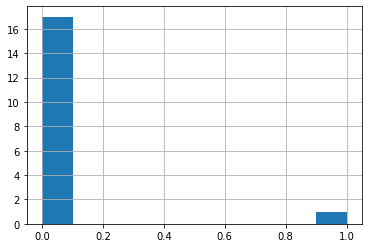

In [17]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count